# Statistical Thinking in Python (Part 2)

## Parameter estimation by optimization

### Optimal parameters

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
nohitters = pd.read_csv('DS\Statistical Thinking in Python (Part 2)\mlb_nohitters.csv')
nohitters.head()

,date,game_number,winning_team,losing_team,winning_pitcher
0,18760715,140,NaN,NaN,NaN
1,18800612,1035,NaN,NaN,NaN
2,18800617,1046,NaN,NaN,NaN
3,18800819,1177,NaN,NaN,NaN
4,18800820,1179,NaN,NaN,NaN


In [25]:
nohitter_times = np.array(nohitters['game_number'])

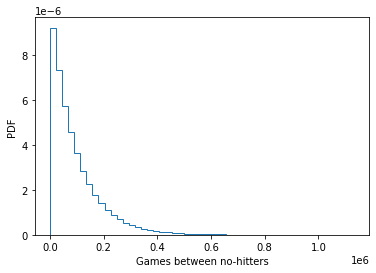

In [26]:
# Seed random number generator
np.random.seed(seed=42)

# Compute mean no-hitter time: tau
tau = np.mean(nohitter_times)

# Draw out of an exponential distribution with parameter tau: inter_nohitter_time
inter_nohitter_time = np.random.exponential(tau, 100000)

# Plot the PDF and label axes
_ = plt.hist(inter_nohitter_time,
             bins=50, density=True, histtype='step')
_ = plt.xlabel('Games between no-hitters')
_ = plt.ylabel('PDF')

# Show the plot
plt.show()


#### Do the data follow our story?


In [27]:
#From Part 1
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

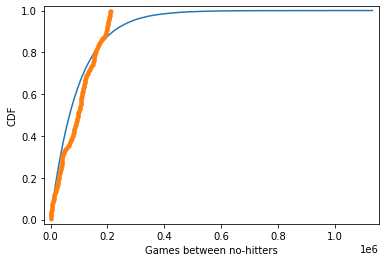

In [28]:
# Create an ECDF from real data: x, y
x, y = ecdf(nohitter_times)

# Create a CDF from theoretical samples: x_theor, y_theor
x_theor, y_theor = ecdf(inter_nohitter_time)

# Overlay the plots
plt.plot(x_theor, y_theor)
plt.plot(x, y, marker='.', linestyle='none')

# Margins and axis labels
plt.margins(0.02)
plt.xlabel('Games between no-hitters')
plt.ylabel('CDF')

# Show the plot
plt.show()


#### How is this parameter optimal?

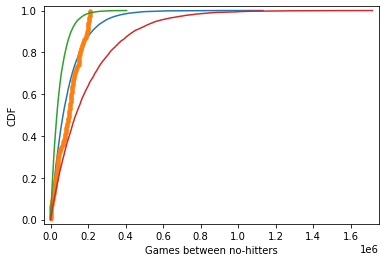

In [29]:
# Plot the theoretical CDFs
plt.plot(x_theor, y_theor)
plt.plot(x, y, marker='.', linestyle='none')
plt.margins(0.02)
plt.xlabel('Games between no-hitters')
plt.ylabel('CDF')

# Take samples with half tau: samples_half
samples_half = np.random.exponential(tau/2, 10000)

# Take samples with double tau: samples_double
samples_double = np.random.exponential(tau*2, 10000)

# Generate CDFs from these samples
x_half, y_half = ecdf(samples_half)
x_double, y_double = ecdf(samples_double)

# Plot these CDFs as lines
_ = plt.plot(x_half, y_half)
_ = plt.plot(x_double, y_double)

# Show the plot
plt.show()

### Linear regression by least squares

#### EDA of literacy/fertility data

In [30]:
females = pd.read_csv('DS\\Statistical Thinking in Python (Part 2)\\female_literacy_fertility.csv')
females.head()

,Country,Continent,female literacy,fertility,population
0,Chine,ASI,90.5,1.769,"1,324,655,000"
1,Inde,ASI,50.8,2.682,"1,139,964,932"
2,USA,NAM,99.0,2.077,"304,060,000"
3,Indonésie,ASI,88.8,2.132,"227,345,082"
4,Brésil,LAT,90.2,1.827,"191,971,506"


In [34]:
illiteracy = np.array(females['female literacy'])
fertility = np.array(females['fertility'])

In [36]:
from sklearn.datasets import load_iris

raw_iris = load_iris()
iris = pd.DataFrame(raw_iris.data, columns=raw_iris.feature_names)
iris['species'] = pd.Categorical.from_codes(raw_iris.target, raw_iris.target_names)
iris.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [37]:
versicolor = iris[iris['species'] == 'versicolor']
versicolor_petal_length = versicolor['petal length (cm)']
versicolor_petal_width = versicolor['petal width (cm)']

In [38]:
def pearson_r(x, y):
    """Compute Pearson correlation coefficient between two arrays."""
    # Compute correlation matrix: corr_mat
    corr_mat = np.corrcoef(x, y)
    
    # Return entry [0,1]
    return corr_mat[0,1]

# Compute Pearson correlation coefficient for I. versicolor: r
r = pearson_r(versicolor_petal_length, versicolor_petal_width)

# Print the result
print(r)

0.7866680885228169


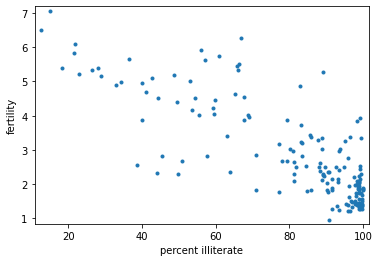

-0.8041324026815347


In [39]:
# Plot the illiteracy rate versus fertility
_ = plt.plot(illiteracy, fertility, marker='.', linestyle='none')

# Set the margins and label axes
plt.margins(0.02)
_ = plt.xlabel('percent illiterate')
_ = plt.ylabel('fertility')

# Show the plot
plt.show()

# Show the Pearson correlation coefficient
print(pearson_r(illiteracy, fertility))

#### Linear regression

slope = -0.049798548090634234 children per woman / percent illiterate
intercept = 6.867905419699977 children per woman


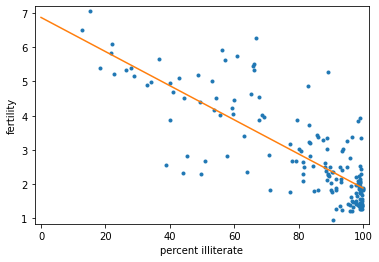

In [40]:
# Plot the illiteracy rate versus fertility
_ = plt.plot(illiteracy, fertility, marker='.', linestyle='none')
plt.margins(0.02)
_ = plt.xlabel('percent illiterate')
_ = plt.ylabel('fertility')

# Perform a linear regression using np.polyfit(): a, b
a, b = np.polyfit(illiteracy, fertility, deg=1)

# Print the results to the screen
print('slope =', a, 'children per woman / percent illiterate')
print('intercept =', b, 'children per woman')

# Make theoretical line to plot
x = np.array([0, 100])
y = a * x + b

# Add regression line to your plot
_ = plt.plot(x, y)

# Draw the plot
plt.show()


#### How is it optimal?

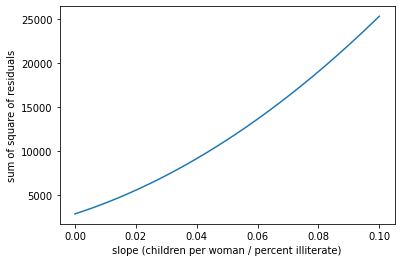

In [41]:
# Specify slopes to consider: a_vals
a_vals = np.linspace(0, 0.1, num=200)

# Initialize sum of square of residuals: rss
rss = np.empty_like(a_vals)

# Compute sum of square of residuals for each value of a_vals
for i, a in enumerate(a_vals):
    rss[i] = np.sum((fertility - a*illiteracy - b)**2)

# Plot the RSS
plt.plot(a_vals, rss, '-')
plt.xlabel('slope (children per woman / percent illiterate)')
plt.ylabel('sum of square of residuals')

plt.show()


### The importance of EDA: Anscombe's quartet


#### Linear regression on appropriate Anscombe data

-0.04979854809063423 6.867905419699976


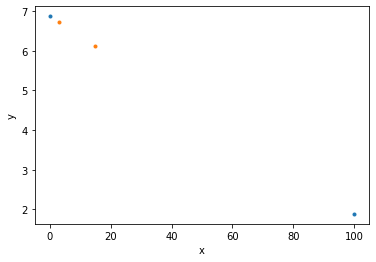

In [42]:
# Perform linear regression: a, b
a, b = np.polyfit(x, y, deg=1)

# Print the slope and intercept
print(a, b)

# Generate theoretical x and y data: x_theor, y_theor
x_theor = np.array([3, 15])
y_theor = a * x_theor + b

# Plot the Anscombe data and theoretical line
_ = plt.plot(x, y, marker='.', linestyle='none')
_ = plt.plot(x_theor, y_theor, marker='.', linestyle='none')

# Label the axes
plt.xlabel('x')
plt.ylabel('y')

# Show the plot
plt.show()

#### Linear regression on all Anscombe data

In [43]:
#Get data
anscombe = pd.read_csv('DS\\Statistical Thinking in Python (Part 2)\\anscombe.csv')
anscombe.head()

,0,0.1,1,1.1,2,2.1,3,3.1
0,x,y,x,y,x,y,x,y
1,10.0,8.04,10.0,9.14,10.0,7.46,8.0,6.58
2,8.0,6.95,8.0,8.14,8.0,6.77,8.0,5.76
3,13.0,7.58,13.0,8.74,13.0,12.74,8.0,7.71
4,9.0,8.81,9.0,8.77,9.0,7.11,8.0,8.84


In [44]:
#Pack data
x1 = np.array(anscombe['0'])[1:].astype(np.float64)
x2 = np.array(anscombe['1'])[1:].astype(np.float64)
x3 = np.array(anscombe['2'])[1:].astype(np.float64)
x4 = np.array(anscombe['3'])[1:].astype(np.float64)

y1 = np.array(anscombe['0.1'])[1:].astype(np.float64)
y2 = np.array(anscombe['1.1'])[1:].astype(np.float64)
y3 = np.array(anscombe['2.1'])[1:].astype(np.float64)
y4 = np.array(anscombe['3.1'])[1:].astype(np.float64)

anscombe_x = [x1, x2, x3, x4]
anscombe_y = [y1, y2, y3, y4]

In [45]:
# Iterate through x,y pairs
for x, y in zip(anscombe_x , anscombe_y):
    # Compute the slope and intercept: a, b
    a, b = np.polyfit(x, y, deg=1)

    # Print the result
    print('slope:', a, 'intercept:', b)


slope: 0.5000909090909094 intercept: 3.000090909090908
slope: 0.5000000000000003 intercept: 3.00090909090909
slope: 0.49972727272727313 intercept: 3.0024545454545453
slope: 0.4999090909090908 intercept: 3.001727272727274


## Bootstrap confidence intervals

### Generating bootstrap replicates


#### Visualizing bootstrap samples

In [46]:
#Get data
sheffieldWS = pd.read_csv("DS\\Statistical Thinking in Python (Part 2)\\sheffield_weather_station.csv", index_col=False, delim_whitespace=True)
sheffieldWS['sun'] = sheffieldWS['sun'].replace('---', 0)
sheffieldWS.head()

,yyyy,mm,tmax,tmin,af,rain,sun
0,1883,1,6.3,1.7,6,122.1,0
1,1883,2,8.0,2.8,2,69.8,0
2,1883,3,4.8,-1.6,23,29.6,0
3,1883,4,12.2,3.8,2,74.0,0
4,1883,5,14.7,6.2,0,31.2,0


In [47]:
rainfall = sheffieldWS['rain']

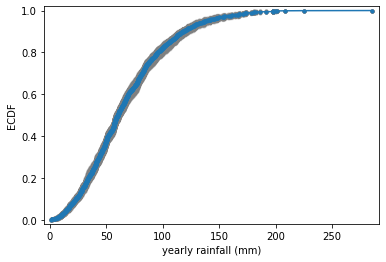

In [48]:
for _ in range(50):
    # Generate bootstrap sample: bs_sample
    bs_sample = np.random.choice(rainfall, size=len(rainfall))

    # Compute and plot ECDF from bootstrap sample
    x, y = ecdf(bs_sample)
    _ = plt.plot(x, y, marker='.', linestyle='none',
                 color='gray', alpha=0.1)

# Compute and plot ECDF from original data
x, y = ecdf(rainfall)
_ = plt.plot(x, y, marker='.')

# Make margins and label axes
plt.margins(0.02)
_ = plt.xlabel('yearly rainfall (mm)')
_ = plt.ylabel('ECDF')

# Show the plot
plt.show()

### Bootstrap confidence intervals


In [49]:
#given f
def bootstrap_replicate_1d(data, func):
    """Generate bootstrap replicate of 1D data."""
    bs_sample = np.random.choice(data, len(data))
    return func(bs_sample)

In [50]:
def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)

    return bs_replicates


#### Bootstrap replicates of the mean and the SEM

0.9488593574676786
0.9427722398781045


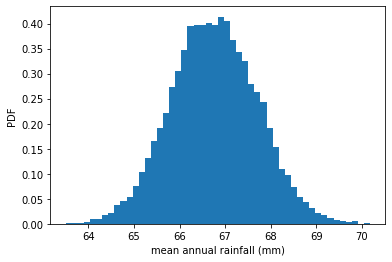

In [51]:
# Take 10,000 bootstrap replicates of the mean: bs_replicates
bs_replicates = draw_bs_reps(rainfall, np.mean, size=10000)

# Compute and print SEM
sem = np.std(rainfall) / np.sqrt(len(rainfall))
print(sem)

# Compute and print standard deviation of bootstrap replicates
bs_std = np.std(bs_replicates)
print(bs_std)

# Make a histogram of the results
_ = plt.hist(bs_replicates, bins=50, density=True)
_ = plt.xlabel('mean annual rainfall (mm)')
_ = plt.ylabel('PDF')

# Show the plot
plt.show()

#### Bootstrap replicates of other statistics

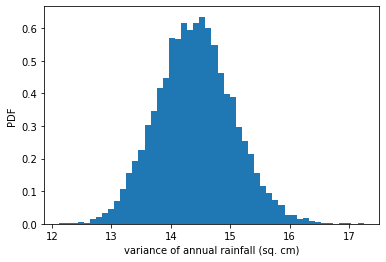

In [52]:
# Generate 10,000 bootstrap replicates of the variance: bs_replicates
bs_replicates = draw_bs_reps(rainfall, np.var, size=10000)

# Put the variance in units of square centimeters
bs_replicates = bs_replicates/100

# Make a histogram of the results
_ = plt.hist(bs_replicates, bins=50, density=True)
_ = plt.xlabel('variance of annual rainfall (sq. cm)')
_ = plt.ylabel('PDF')

# Show the plot
plt.show()


#### Confidence interval on the rate of no-hitters

95% confidence interval = [ 89140.1287415  103927.65238095] games


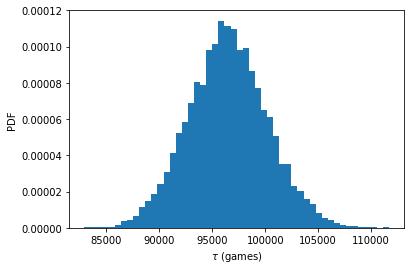

In [53]:
# Draw bootstrap replicates of the mean no-hitter time (equal to tau): bs_replicates
bs_replicates = draw_bs_reps(nohitter_times, np.mean, size=10000)

# Compute the 95% confidence interval: conf_int
conf_int = np.percentile(bs_replicates,[2.5, 97.5])

# Print the confidence interval
print('95% confidence interval =', conf_int, 'games')

# Plot the histogram of the replicates
_ = plt.hist(bs_replicates, bins=50, density=True)
_ = plt.xlabel(r'$\tau$ (games)')
_ = plt.ylabel('PDF')

# Show the plot
plt.show()


### Pairs bootstrap


#### A function to do pairs bootstrap

In [54]:
def draw_bs_pairs_linreg(x, y, size=1):
    """Perform pairs bootstrap for linear regression."""

    # Set up array of indices to sample from: inds
    inds = np.arange(len(x))

    # Initialize replicates: bs_slope_reps, bs_intercept_reps
    bs_slope_reps = np.empty(size)
    bs_intercept_reps = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_inds = np.random.choice(inds, size=len(inds))
        bs_x, bs_y = x[bs_inds], y[bs_inds]
        bs_slope_reps[i], bs_intercept_reps[i] = np.polyfit(bs_x, bs_y, 1)

    return bs_slope_reps, bs_intercept_reps

#### Pairs bootstrap of literacy/fertility data

[-0.05576627 -0.04407149]


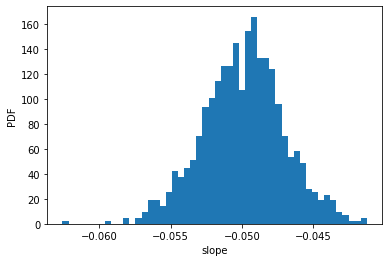

In [55]:
# Generate replicates of slope and intercept using pairs bootstrap
bs_slope_reps, bs_intercept_reps = draw_bs_pairs_linreg(illiteracy, fertility, 1000)

# Compute and print 95% CI for slope
print(np.percentile(bs_slope_reps, [2.5, 97.5]))

# Plot the histogram
_ = plt.hist(bs_slope_reps, bins=50, density=True)
_ = plt.xlabel('slope')
_ = plt.ylabel('PDF')
plt.show()

#### Plotting bootstrap regressions

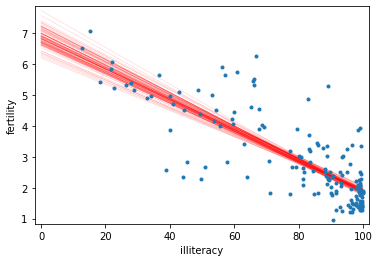

In [56]:
# Generate array of x-values for bootstrap lines: x
x = np.array([0,100])

# Plot the bootstrap lines
for i in range(100):
    _ = plt.plot(x, 
                 bs_slope_reps[i]*x + bs_intercept_reps[i],
                 linewidth=0.5, alpha=0.2, color='red')

# Plot the data
_ = plt.plot(illiteracy, fertility, marker='.', linestyle='none')

# Label axes, set the margins, and show the plot
_ = plt.xlabel('illiteracy')
_ = plt.ylabel('fertility')
plt.margins(0.02)
plt.show()

## Introduction to hypothesis testing

### Formulating and simulating a hypothesis


#### Generating a permutation sample

In [57]:
def permutation_sample(data1, data2):
    """Generate a permutation sample from two data sets."""

    # Concatenate the data sets: data
    data = np.concatenate((data1, data2))

    # Permute the concatenated array: permuted_data
    permuted_data = np.random.permutation(data)

    # Split the permuted array into two: perm_sample_1, perm_sample_2
    perm_sample_1 = permuted_data[:len(data1)]
    perm_sample_2 = permuted_data[len(data1):]

    return perm_sample_1, perm_sample_2

#### Visualizing permutation sampling

In [59]:
sheffieldWS.head()

,yyyy,mm,tmax,tmin,af,rain,sun
0,1883,1,6.3,1.7,6,122.1,0
1,1883,2,8.0,2.8,2,69.8,0
2,1883,3,4.8,-1.6,23,29.6,0
3,1883,4,12.2,3.8,2,74.0,0
4,1883,5,14.7,6.2,0,31.2,0


In [60]:
rain_june = sheffieldWS[sheffieldWS['mm']==6]['rain']
rain_november = sheffieldWS[sheffieldWS['mm']==11]['rain']

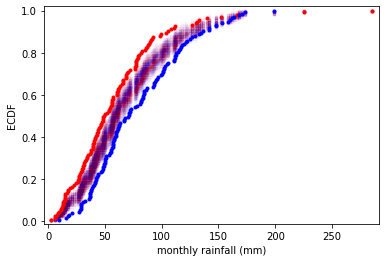

In [61]:
for i in range(50):
    # Generate permutation samples
    perm_sample_1, perm_sample_2 = permutation_sample(rain_june, rain_november)


    # Compute ECDFs
    x_1, y_1 = ecdf(perm_sample_1)
    x_2, y_2 = ecdf(perm_sample_2)

    # Plot ECDFs of permutation sample
    _ = plt.plot(x_1, y_1, marker='.', linestyle='none',
                 color='red', alpha=0.02)
    _ = plt.plot(x_2, y_2, marker='.', linestyle='none',
                 color='blue', alpha=0.02)

# Create and plot ECDFs from original data
x_1, y_1 = ecdf(rain_june)
x_2, y_2 = ecdf(rain_november)
_ = plt.plot(x_1, y_1, marker='.', linestyle='none', color='red')
_ = plt.plot(x_2, y_2, marker='.', linestyle='none', color='blue')

# Label axes, set margin, and show plot
plt.margins(0.02)
_ = plt.xlabel('monthly rainfall (mm)')
_ = plt.ylabel('ECDF')
plt.show()

### Test statistics and p-values


#### Generating permutation replicates